In [44]:
import cv2
import numpy as np

#here we are reading the fingerprint image
image = cv2.imread('./Input/fig_1.jpg', cv2.IMREAD_GRAYSCALE)

In [45]:
# Threshold the image
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [46]:
# Apply morphological operations to enhance the ridges
kernel = np.ones((3, 3), np.uint8)
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel, iterations=3)

In [47]:
# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

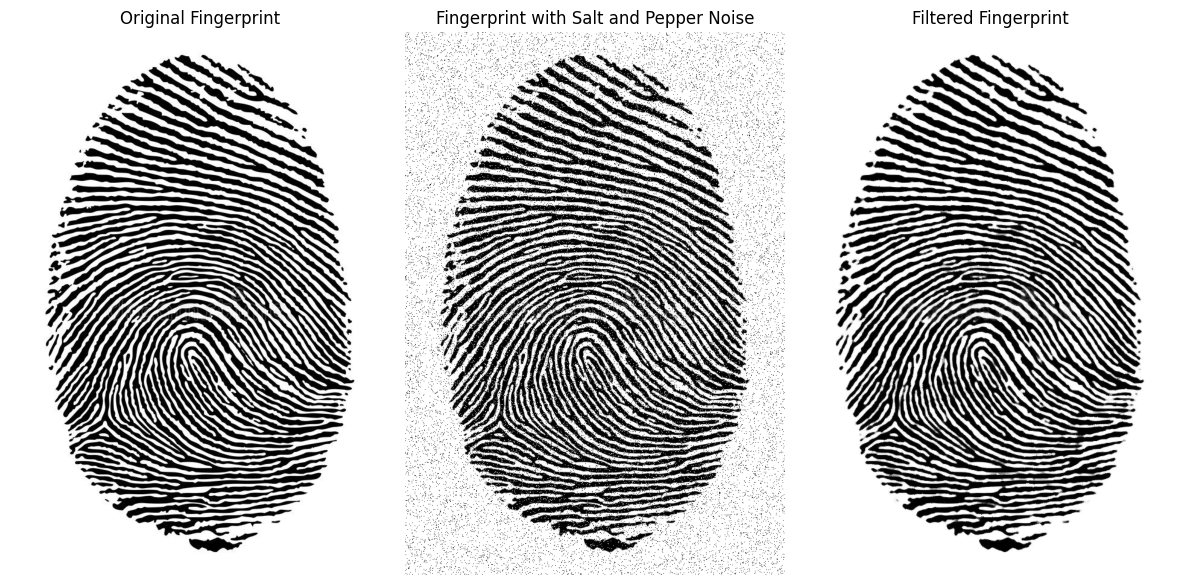

In [49]:
import matplotlib.pyplot as plt

# Read the fingerprint image
fingerprint_img = cv2.imread('./Input/Fig_2.jpg', cv2.IMREAD_GRAYSCALE)

# Add salt and pepper noise
noise = np.random.random(fingerprint_img.shape)
salt_pepper_img = np.where(noise > 0.95, 255, np.where(noise < 0.05, 0, fingerprint_img))

# Apply median filter for noise reduction
filtered_img = cv2.medianBlur(salt_pepper_img, 5)

# Save the filtered fingerprint image in JPEG format
cv2.imwrite('filtered_fingerprint2.jpeg', filtered_img)

# Plot the original, noisy, and filtered images
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(fingerprint_img, cmap='gray')
plt.title('Original Fingerprint')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(salt_pepper_img, cmap='gray')
plt.title('Fingerprint with Salt and Pepper Noise')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_img, cmap='gray')
plt.title('Filtered Fingerprint')
plt.axis('off')

plt.tight_layout()
plt.show()

In [29]:
# Filter contours based on area to eliminate noise
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]

In [30]:
filtered_contours

[array([[[262,  45]],
 
        [[260,  47]],
 
        [[255,  47]],
 
        ...,
 
        [[265,  49]],
 
        [[264,  48]],
 
        [[264,  45]]], dtype=int32),
 array([[[283,  38]],
 
        [[281,  40]],
 
        [[281,  41]],
 
        [[280,  42]],
 
        [[273,  42]],
 
        [[273,  43]],
 
        [[277,  47]],
 
        [[278,  47]],
 
        [[279,  48]],
 
        [[280,  48]],
 
        [[281,  49]],
 
        [[283,  49]],
 
        [[284,  50]],
 
        [[285,  50]],
 
        [[290,  55]],
 
        [[292,  55]],
 
        [[293,  56]],
 
        [[294,  56]],
 
        [[295,  57]],
 
        [[296,  57]],
 
        [[298,  59]],
 
        [[299,  59]],
 
        [[300,  60]],
 
        [[303,  60]],
 
        [[304,  61]],
 
        [[305,  61]],
 
        [[309,  65]],
 
        [[314,  65]],
 
        [[317,  68]],
 
        [[318,  68]],
 
        [[319,  69]],
 
        [[321,  69]],
 
        [[322,  70]],
 
        [[323,  70]],
 
        [[32

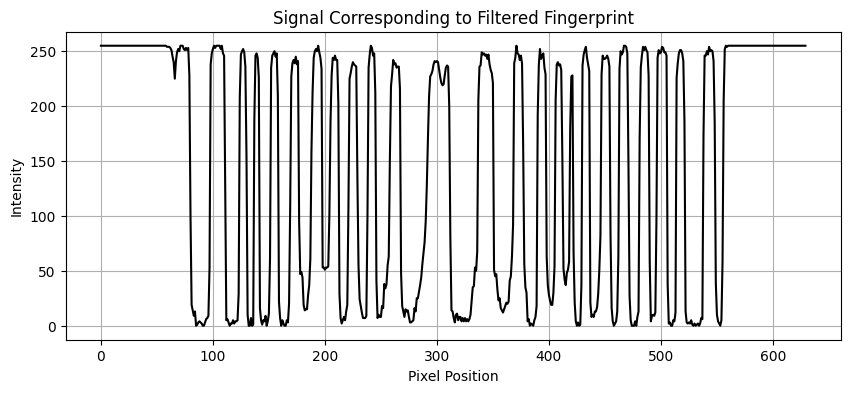

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the filtered fingerprint image
filtered_fingerprint_img = cv2.imread('filtered_fingerprint2.jpeg', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if filtered_fingerprint_img is not None:
    # Extract a horizontal line of pixel intensity values from the middle of the image
    line_y = filtered_fingerprint_img.shape[0] // 2
    line_intensity = filtered_fingerprint_img[line_y, :]

    # Plot the signal corresponding to the filtered fingerprint
    plt.figure(figsize=(10, 4))
    plt.plot(line_intensity, color='black')
    plt.title('Signal Corresponding to Filtered Fingerprint')
    plt.xlabel('Pixel Position')
    plt.ylabel('Intensity')
    plt.grid(True)
    plt.show()
else:
    print("Error: Unable to load the filtered fingerprint image.")


In [51]:
def ridge_frequency(image, block_size=16):
    rows, cols = image.shape
    freq = np.zeros_like(image, dtype=np.float32)

    for r in range(0, rows - block_size, block_size):
        for c in range(0, cols - block_size, block_size):
            block = image[r:r+block_size, c:c+block_size]
            f = cv2.dct(block.astype(np.float32))
            freq[r:r+block_size, c:c+block_size] = f

    return freq

def ridge_flow(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    flow = cv2.phase(sobelx, sobely, angleInDegrees=True)
    return flow

def ridge_curvature(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobelxx = cv2.Sobel(sobelx, cv2.CV_64F, 1, 0, ksize=3)
    sobelyy = cv2.Sobel(sobely, cv2.CV_64F, 0, 1, ksize=3)
    curvature = cv2.magnitude(sobelxx, sobelyy)
    return curvature

# Load the fingerprint image
image = cv2.imread('filtered_fingerprint2.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to smooth the image
image_blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Extract ridge frequency
ridge_freq = ridge_frequency(image_blurred)

# Extract ridge flow
ridge_flow = ridge_flow(image_blurred)

# Extract ridge curvature
ridge_curv = ridge_curvature(image_blurred)

# Display results
cv2.imshow('Ridge Frequency', ridge_freq)
cv2.imshow('Ridge Flow', ridge_flow)
cv2.imshow('Ridge Curvature', ridge_curv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [52]:
import cv2
import numpy as np

# Load the fingerprint image
image = cv2.imread('filtered_fingerprint2.jpeg', cv2.IMREAD_GRAYSCALE)

# Threshold the image
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Apply morphological operations to enhance the ridges
kernel = np.ones((3, 3), np.uint8)
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel, iterations=3)

# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area to eliminate noise
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]

# Draw extracted contours
result_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(result_image, filtered_contours, -1, (0, 255, 0), 2)

# Display the result
cv2.imshow('Minutiae Extraction', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Ridge count: 0.01
Core point coordinates: 314 449


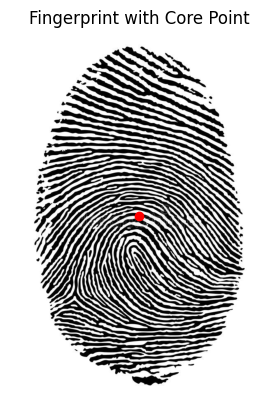

In [55]:
def calculate_ridge_count(image, line_length=100):
    # Apply Canny edge detection to the image
    edges = cv2.Canny(image, 50, 150)

    # Hough transform to detect lines
    lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=200)

    # Calculate ridge count
    ridge_count = 0
    if lines is not None:
        for rho, theta in lines[:, 0]:
            if 0.25 * np.pi <= theta <= 0.75 * np.pi:  # Filter vertical lines (ridges)
                ridge_count += 1

    # Normalize ridge count by line length
    ridge_count_normalized = ridge_count / line_length

    return ridge_count_normalized

def locate_core_point(image):
    # Apply skeletonization to the image
    skeleton = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)[1]

    # Find contours of the skeletonized image
    contours, _ = cv2.findContours(skeleton, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the centroid of the largest contour as the core point
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        M = cv2.moments(largest_contour)
        core_point_x = int(M['m10'] / M['m00'])
        core_point_y = int(M['m01'] / M['m00'])
        return core_point_x, core_point_y
    else:
        return None, None

# Load the fingerprint image
image = cv2.imread('./Input/Fig_1.jpg', 0)

# Calculate ridge count
ridge_count = calculate_ridge_count(image)

# Locate core point
core_point_x, core_point_y = locate_core_point(image)

print("Ridge count:", ridge_count)
print("Core point coordinates:", core_point_x, core_point_y)

# Display the image with core point
plt.imshow(image, cmap='gray')
if core_point_x is not None and core_point_y is not None:
    plt.plot(core_point_x, core_point_y, 'ro')  # Plot core point
plt.title('Fingerprint with Core Point')
plt.axis('off')
plt.show()


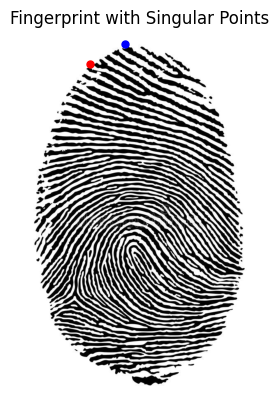

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_singular_points(image):
    # Apply Sobel edge detection to the image
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

    # Compute magnitude and direction of gradient
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    direction = np.arctan2(sobel_y, sobel_x)

    # Define threshold for edge detection
    edge_threshold = 100

    # Apply thresholding to identify edges
    edges = magnitude > edge_threshold

    # Apply morphological operations to enhance edge connectivity
    kernel = np.ones((3, 3), np.uint8)
    edges = cv2.morphologyEx(edges.astype(np.uint8), cv2.MORPH_CLOSE, kernel)

    # Find contours of the edges
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize lists to store singular points (ridge endings and bifurcations)
    ridge_endings = []
    bifurcations = []

    # Iterate through contours
    for contour in contours:
        # Approximate the contour to reduce the number of points
        approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)

        # Calculate the number of vertices (corner points)
        num_vertices = len(approx)

        # Singular points are classified based on the number of vertices
        if num_vertices == 1:
            # Ridge ending
            ridge_endings.append(approx.ravel())
        elif num_vertices >= 3:
            # Bifurcation
            bifurcations.append(approx.ravel())

    return ridge_endings, bifurcations

# Load the fingerprint image
image = cv2.imread('./Input/Fig_1.jpg', cv2.IMREAD_GRAYSCALE)

# Detect singular points (ridge endings and bifurcations)
ridge_endings, bifurcations = detect_singular_points(image)

# Visualize singular points on the fingerprint image
plt.imshow(image, cmap='gray')
for point in ridge_endings:
    plt.plot(point[0], point[1], 'ro', markersize=5)  # Ridge ending (red)
for point in bifurcations:
    plt.plot(point[0], point[1], 'bo', markersize=5)  # Bifurcation (blue)
plt.title('Fingerprint with Singular Points')
plt.axis('off')
plt.show()


In [57]:
# Load the template fingerprint image
template_image = cv2.imread('./Input/Fig_1.jpg', cv2.IMREAD_GRAYSCALE)

# Load the query fingerprint image
query_image = cv2.imread('./Input/Fig_2.jpg', cv2.IMREAD_GRAYSCALE)

# Resize both images to 500x300 pixels
template_image = cv2.resize(template_image, (500, 300))
query_image = cv2.resize(query_image, (500, 300))

# Flatten the images into 1D vectors
template_vector = template_image.flatten()
query_vector = query_image.flatten()

# Compute Euclidean distance between feature vectors
euclidean_distance = np.linalg.norm(template_vector - query_vector)

print("Euclidean Distance:", euclidean_distance)

Euclidean Distance: 0.0


In [58]:
import cv2

# Load the template fingerprint image
template_image = cv2.imread('./Input/Fig_1.jpg', cv2.IMREAD_GRAYSCALE)

# Load the query fingerprint image
query_image = cv2.imread('./Input/Fig_2.jpg', cv2.IMREAD_GRAYSCALE)

# Perform template matching using correlation coefficient
result = cv2.matchTemplate(query_image, template_image, cv2.TM_CCOEFF_NORMED)

# Get the best match location
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

print("Template Matching Score:", max_val)


Template Matching Score: 1.0


In [59]:
def compare_fingerprints(input_fingerprint, database_fingerprint):
    # Load the input fingerprint image
    input_image = cv2.imread('./Input/Fig_1.jpg', cv2.IMREAD_GRAYSCALE)

    # Load the database fingerprint image
    database_image = cv2.imread('./Input/Fig_1.jpg', cv2.IMREAD_GRAYSCALE)

    # Resize both images to 500x300 pixels
    input_image = cv2.resize(input_image, (500, 300))
    database_image = cv2.resize(database_image, (500, 300))

    # Flatten the images into 1D vectors
    input_vector = input_image.flatten()
    database_vector = database_image.flatten()

    # Compute Euclidean distance between feature vectors
    euclidean_distance = np.linalg.norm(input_vector - database_vector)

    # Compare the Euclidean distance
    if euclidean_distance == 0:
        print("Fingerprints match perfectly.")
    else:
        print("Fingerprints do not match.")
        print("Euclidean Distance:", euclidean_distance)

# Example usage
input_fingerprint_path = 'input_fingerprint.jpeg'
database_fingerprint_path = 'database_fingerprint.jpeg'

compare_fingerprints(input_fingerprint_path, database_fingerprint_path)

Fingerprints match perfectly.
